In [1]:
import pandas as pd
import numpy as np
import re
import string

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv(r'/content/drive/MyDrive/original/train.csv')

In [ ]:
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [ ]:
data = data.dropna()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18285 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      18285 non-null  int64 
 1   title   18285 non-null  object
 2   author  18285 non-null  object
 3   text    18285 non-null  object
 4   label   18285 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 857.1+ KB


In [ ]:
data = data.drop(['id','title','author'], axis=1)

In [ ]:
!pip install nltk
!pip install regex
!pip install contractions
import re
import contractions
import nltk
from nltk.corpus import wordnet
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('words') #download list of english words
nltk.download('stopwords') #download list of stopwords
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
stopWords = stopwords.words('english')
englishWords = set(nltk.corpus.words.words())


def remove_contractions(text): 
    return ' '.join([contractions.fix(word) for word in text.split()])

tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()

def nltkToWordnet(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:                    
        return None

def lemmatize(tokens):
    pos_tags = nltk.pos_tag(tokens)    
    res_words = []
    for word, tag in pos_tags:
        tag = nltkToWordnet(tag)    
        if tag is None:                        
            res_words.append(word)
        else:
            res_words.append(lemmatizer.lemmatize(word, tag))
    return res_words

def remove_stopWords(tokens):
    return [w for w in tokens if (w in englishWords and w not in stopWords)]

def split_and_filter_words(string):
  words = string.split()
  if len(words) > 20:
    return " ".join(words)
  return None

def clean_text(text):
    text = ' '.join([contractions.fix(word) for word in text.split()])
    # Tokenize text
    tokens = tokenizer.tokenize(text)
    # Lemmatize tokens
    tokens = lemmatize(tokens)
    # Remove stopwords
    tokens = remove_stopWords(tokens)
    # Print results
    text = " ".join(tokens)
    return text


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
data['text'] = data['text'].astype(str)
#lowercase
data['text'] = data['text'].apply(lambda x: x.lower())
#apply len check
data['text'] = data['text'].apply(lambda x: " ".join(x.split()[:750]))
#url removal
data['text'] = data['text'].apply(lambda x: re.sub(r"http\S+", "", x))
# remove special characters, numbers, and punctuation
data['text'] = data['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))  
data['text'] = data['text'].apply(clean_text)
data['text'] = data['text'].apply(split_and_filter_words)

In [ ]:
print(data['text'])

0        house aide even see letter tweet subscribe stu...
1        ever get feeling life circle roundabout rather...
2        truth might get fire tension intelligence anal...
3        video civilian kill single us identify rate ci...
4        print woman sentence six year prison revolutio...
                               ...                        
20795    rapper unload black celebrity meet trump elect...
20796    green bay packer lose week dropping vow run ta...
20797    today grow union several great name include na...
20798    russia hold parallel exercise press russia mil...
20799    author activist journalist radio host peace pr...
Name: text, Length: 18285, dtype: object


In [ ]:
data = data.dropna()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17544 entries, 0 to 20799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    17544 non-null  object
 1   label   17544 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 411.2+ KB


In [ ]:
data.head()

,text,label
0,house aide even see letter tweet subscribe stu...,1
1,ever get feeling life circle roundabout rather...,0
2,truth might get fire tension intelligence anal...,1
3,video civilian kill single us identify rate ci...,1
4,print woman sentence six year prison revolutio...,1


In [ ]:
data = data.rename({'text': 'statement'}, axis=1)

In [ ]:
data

,statement,label
0,house aide even see letter tweet subscribe stu...,1
1,ever get feeling life circle roundabout rather...,0
2,truth might get fire tension intelligence anal...,1
3,video civilian kill single us identify rate ci...,1
4,print woman sentence six year prison revolutio...,1
...,...,...
20795,rapper unload black celebrity meet trump elect...,0
20796,green bay packer lose week dropping vow run ta...,0
20797,today grow union several great name include na...,0
20798,russia hold parallel exercise press russia mil...,1


In [ ]:
# saving the dataframe
data.to_csv(r'/content/drive/MyDrive/New/Clean/FakeNews_clean.csv')

In [3]:
data = pd.read_csv(r'/content/drive/MyDrive/New/Clean/FakeNews_clean.csv')

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v = TfidfVectorizer(max_features=5000, ngram_range=(1,3))
X = tfidf_v.fit_transform(data['statement']).toarray()
y = data['label']

import joblib
# Save the TfidfVectorizer
joblib.dump(tfidf_v, '/content/drive/MyDrive/Colab Notebooks/weights/FN/learners/tfidf_fn.pkl')

['/content/drive/MyDrive/Colab Notebooks/weights/FN/learners/tfidf_fn.pkl']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score as acs
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      2053
           1       0.92      0.88      0.90      1456

    accuracy                           0.92      3509
   macro avg       0.92      0.91      0.92      3509
weighted avg       0.92      0.92      0.92      3509

Precision: 0.919 / Recall: 0.881 / F1-Score: 0.9 / Accuracy: 0.918


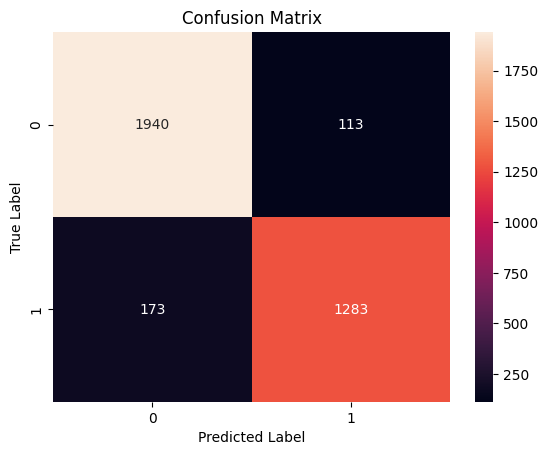

In [ ]:
from sklearn import linear_model
logr = linear_model.LogisticRegression()
logr.fit(X_train,y_train)
y_pred = logr.predict(X_test)

# Calculate the accuracy of the model
print(classification_report(y_test, y_pred))

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label=1, average='binary')
print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), round(acs(y_test,y_pred), 3)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
class_label = [0, 1]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Model accuracy score with default hyperparameters: 0.9325
Precision: 0.93 / Recall: 0.906 / F1-Score: 0.918 / Accuracy: 0.932
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2053
           1       0.93      0.91      0.92      1456

    accuracy                           0.93      3509
   macro avg       0.93      0.93      0.93      3509
weighted avg       0.93      0.93      0.93      3509



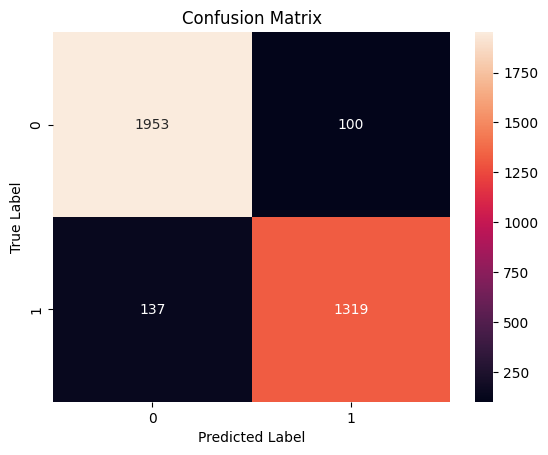

['/content/drive/MyDrive/Colab Notebooks/weights/FN/svm_fn.pkl']

In [ ]:
# import SVC classifier
from sklearn.svm import SVC
# import metrics to compute accuracy
from sklearn.metrics import accuracy_score
# instantiate classifier with default hyperparameters
svc=SVC() 

# fit classifier to training set
svc.fit(X_train,y_train)

# make predictions on test set
y_pred=svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label=1, average='binary')
print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), round(acs(y_test,y_pred), 3)))

# Calculate the accuracy of the model
print(classification_report(y_test, y_pred))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
class_label = [0, 1]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

joblib.dump(svc, '/content/drive/MyDrive/Colab Notebooks/weights/FN/svm_fn.pkl')

Iteration 1, loss = 0.44041106
Iteration 2, loss = 0.14850075
Iteration 3, loss = 0.08608916
Iteration 4, loss = 0.05060193
Iteration 5, loss = 0.03045854
Iteration 6, loss = 0.01625495
Iteration 7, loss = 0.00956311
Iteration 8, loss = 0.00539856
Iteration 9, loss = 0.00313996
Iteration 10, loss = 0.00222331
Iteration 11, loss = 0.00186187
Iteration 12, loss = 0.00164513
Iteration 13, loss = 0.00149386
Iteration 14, loss = 0.00138086
Iteration 15, loss = 0.00129336
Iteration 16, loss = 0.00122088
Iteration 17, loss = 0.00116412
Iteration 18, loss = 0.00111495
Iteration 19, loss = 0.00107481
Iteration 20, loss = 0.00103988
Iteration 21, loss = 0.00100900
Iteration 22, loss = 0.00098160
Iteration 23, loss = 0.00095738
Iteration 24, loss = 0.00093495
Iteration 25, loss = 0.00091494
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Accuracy: 0.9176403533770305
Precision: 0.904 / Recall: 0.897 / F1-Score: 0.9 / Accuracy: 0.918
              precision

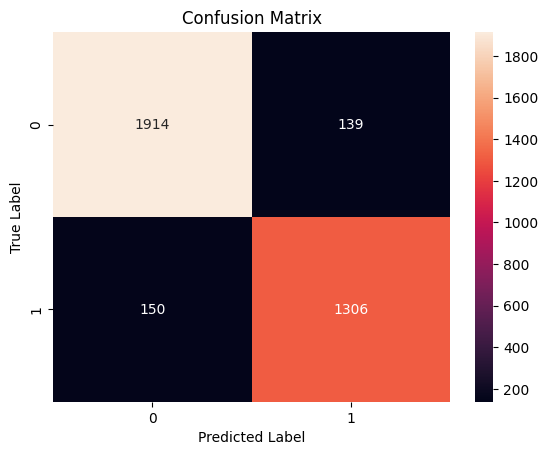

['/content/drive/MyDrive/Colab Notebooks/weights/FN/mlp_fn.pkl']

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

# Create model object
clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)

# Fit data onto the model
clf.fit(X_train,y_train)

# Make prediction on test dataset
y_pred=clf.predict(X_test)

# Import accuracy score 
from sklearn.metrics import accuracy_score

# Calcuate accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label=1, average='binary')
print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), round(acs(y_test,y_pred), 3)))

# Calculate the accuracy of the model
print(classification_report(y_test, y_pred))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
class_label = [0, 1]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



Precision: 0.855 / Recall: 0.686 / F1-Score: 0.761 / Accuracy: 0.821
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      2053
           1       0.85      0.69      0.76      1456

    accuracy                           0.82      3509
   macro avg       0.83      0.80      0.81      3509
weighted avg       0.83      0.82      0.82      3509



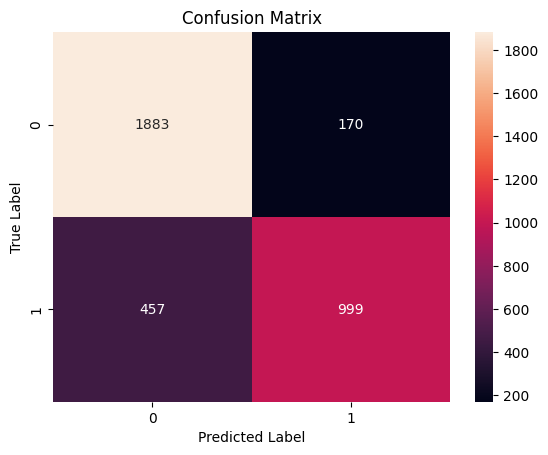

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
  
knn.fit(X_train, y_train)
  
# Predict on dataset which model has not seen before
y_pred = knn.predict(X_test)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label=1, average='binary')
print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), round(acs(y_test,y_pred), 3)))
    
# Calculate the accuracy of the model
print(classification_report(y_test, y_pred))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
class_label = [0, 1]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Precision: 0.954 / Recall: 0.824 / F1-Score: 0.884 / Accuracy: 0.911
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2053
           1       0.95      0.82      0.88      1456

    accuracy                           0.91      3509
   macro avg       0.92      0.90      0.91      3509
weighted avg       0.91      0.91      0.91      3509



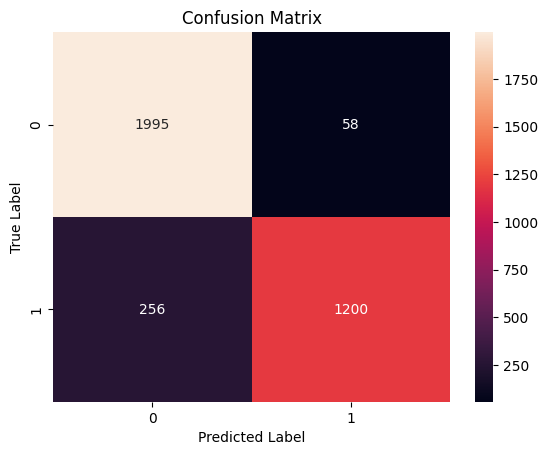

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)

rf_model = rf.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label=1, average='binary')
print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), round(acs(y_test,y_pred), 3)))

# Calculate the accuracy of the model
print(classification_report(y_test, y_pred))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
class_label = [0, 1]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Precision: 0.923 / Recall: 0.898 / F1-Score: 0.91 / Accuracy: 0.926


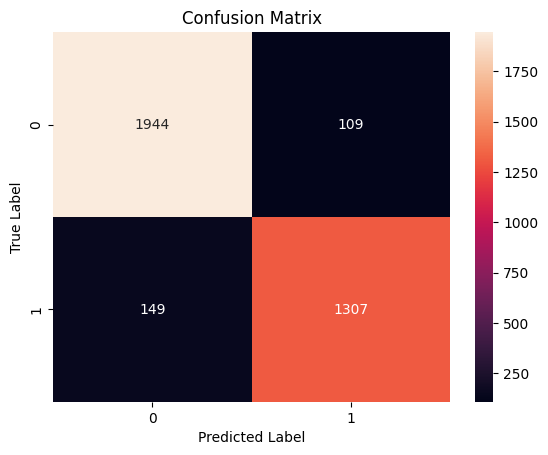

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Initialize the classifiers
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
lr_clf = LogisticRegression(max_iter=1000, random_state=42)
knn_clf = KNeighborsClassifier(n_neighbors=5)


# Combine the classifiers using a voting ensemble
voting_clf = VotingClassifier(estimators=[('rf', rf_clf), ('lr', lr_clf), ('knn', knn_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

# Make predictions using the voting classifier
voting_preds = voting_clf.predict(X_test)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label=1, average='binary')
print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), round(acs(y_test,y_pred), 3)))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
class_label = [0, 1]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [8]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
regressor = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

predictions = [round(value) for value in y_pred]

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.8996865203761756
Precision: 0.8796423658872077
Recall: 0.8784340659340659
F1-Score: 0.8790378006872852


In [9]:
mse = mean_squared_error(y_test,y_pred)
print("MSE : % f" %(mse))

MSE :  0.083709


In [10]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE : % f" %(rmse))

RMSE :  0.289326


In [11]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=100,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
predictions = [round(value) for value in y_pred]

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.890282131661442
Accuracy: 0.890282131661442
Precision: 0.8752627890679747
Recall: 0.8578296703296703
F1-Score: 0.8664585501214014


Accuracy: 0.8082074665146766
Precision: 0.759 / Recall: 0.787 / F1-Score: 0.773 / Accuracy: 0.808
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      2053
           1       0.76      0.79      0.77      1456

    accuracy                           0.81      3509
   macro avg       0.80      0.81      0.80      3509
weighted avg       0.81      0.81      0.81      3509



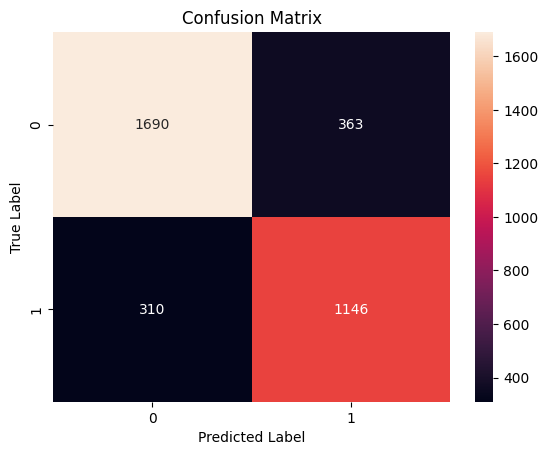

In [ ]:
 from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label=1, average='binary')
print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), round(acs(y_test,y_pred), 3)))

# Calculate the accuracy of the model
print(classification_report(y_test, y_pred))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
class_label = [0, 1]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=acae6ee9-335d-4e3f-adb7-fdcb7783098d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>